In [21]:
import joblib 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
df=pd.read_csv(r"D:\supermarket_sales.csv")
df.head()

<IPython.core.display.Javascript object>

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [23]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [24]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [25]:
df.shape

(1000, 17)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

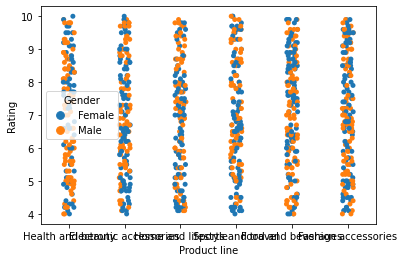

In [26]:
sns.stripplot(x=df['Product line'],y=df['Rating'],hue=df['Gender'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

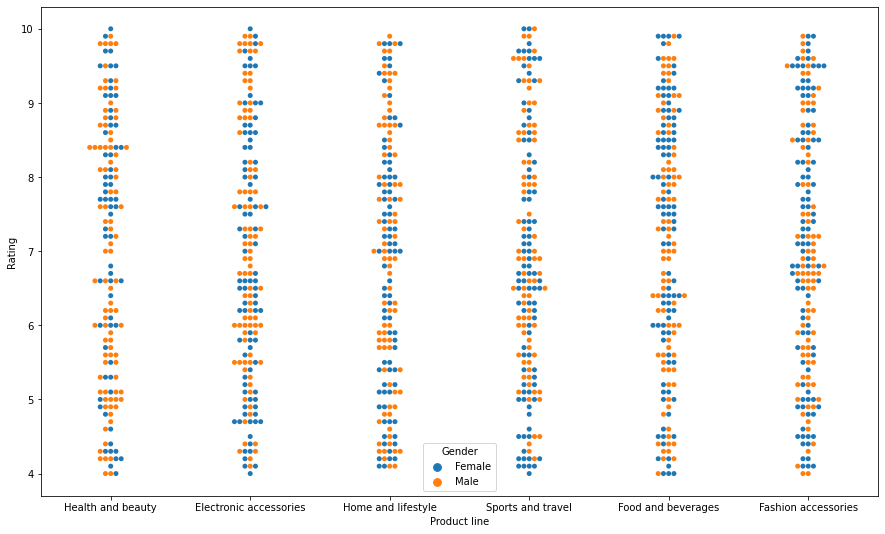

In [27]:
fig, ax = plt.subplots(figsize=(15,9))
sns.swarmplot(x=df['Product line'],y=df['Rating'],hue=df['Gender'],ax=ax)
plt.show()

In [28]:
for i in df.columns:
    print(sum(df[i].isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [29]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [30]:
df_x = df.iloc[:, 1:16]
df_y = df.iloc[:, 16]

In [31]:
df_x.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085


In [32]:
def clean_data(df):
    df.drop(columns=['Date','Time'], inplace=True)
    le = LabelEncoder()
    df = pd.get_dummies(data = df, columns=["Branch"], drop_first = False)
    df = pd.get_dummies(data = df, columns=["City"], drop_first = False)
    df = pd.get_dummies(data = df, columns=["Customer type"], drop_first = False)
    df.Gender = le.fit_transform(df.Gender)
    df = pd.get_dummies(data = df, columns=["Product line"], drop_first = False)
    df = pd.get_dummies(data = df, columns=["Payment"], drop_first = False)
    df = df.sort_index(axis=1)
    return df

df_x = clean_data(df_x)
df_x

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender,Payment_Cash,...,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Quantity,Tax 5%,Total,Unit price,cogs,gross income,gross margin percentage
0,1,0,0,0,0,1,1,0,0,0,...,1,0,0,7,26.1415,548.9715,74.69,522.83,26.1415,4.761905
1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,5,3.8200,80.2200,15.28,76.40,3.8200,4.761905
2,1,0,0,0,0,1,0,1,1,0,...,0,1,0,7,16.2155,340.5255,46.33,324.31,16.2155,4.761905
3,1,0,0,0,0,1,1,0,1,0,...,1,0,0,8,23.2880,489.0480,58.22,465.76,23.2880,4.761905
4,1,0,0,0,0,1,0,1,1,0,...,0,0,1,7,30.2085,634.3785,86.31,604.17,30.2085,4.761905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,1,1,0,...,1,0,0,1,2.0175,42.3675,40.35,40.35,2.0175,4.761905
996,0,1,0,1,0,0,0,1,0,0,...,0,1,0,10,48.6900,1022.4900,97.38,973.80,48.6900,4.761905
997,1,0,0,0,0,1,1,0,1,1,...,0,0,0,1,1.5920,33.4320,31.84,31.84,1.5920,4.761905
998,1,0,0,0,0,1,0,1,1,1,...,0,1,0,1,3.2910,69.1110,65.82,65.82,3.2910,4.761905


In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)
joblib.dump(X_train.columns, "columns.pkl")

['columns.pkl']

In [34]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128,activation='relu'))
NN_model.add(Dense(64, activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 28,161
Trainable params: 28,161
Non-trainable params: 0
_________________________________________________________________


In [35]:
NN_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split = 0.2)

Epoch 1/50
20/20 [==============================] - 1s 21ms/step - loss: 4.4088 - mean_absolute_error: 4.4088 - val_loss: 3.7311 - val_mean_absolute_error: 3.7311
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 3.1913 - mean_absolute_error: 3.1913 - val_loss: 3.4470 - val_mean_absolute_error: 3.4470
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 2.7471 - mean_absolute_error: 2.7471 - val_loss: 2.6086 - val_mean_absolute_error: 2.6086
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 2.6425 - mean_absolute_error: 2.6425 - val_loss: 3.2210 - val_mean_absolute_error: 3.2210
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 2.6904 - mean_absolute_error: 2.6904 - val_loss: 2.4141 - val_mean_absolute_error: 2.4141
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 2.4464 - mean_absolute_error: 2.4464 - val_loss: 2.2594 - val_mean_absolute_error: 2.2594
Epoch 7/50
20/20 [=========

In [36]:
y_pred = NN_model.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error 
MAE = mean_absolute_error(y_test , y_pred)
print('Deep Neural Network model MAE = ', MAE)

Deep Neural Network model MAE =  1.6292202305793766


In [14]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = 12)
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
#MAE = mean_absolute_error(val_y , predicted_prices)


<IPython.core.display.Javascript object>

In [15]:
import pickle
filename = 'fynnlabs_project1_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [16]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(val_X)
#MAE = mean_absolute_error(val_y , XGBpredictions)

In [17]:
from sklearn import datasets, linear_model, metrics

In [18]:

train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = 12)
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
predicted_prices = reg.predict(val_X)
#MAE = mean_absolute_error(val_y , predicted_prices)